<a href="https://colab.research.google.com/github/IbrahimEnouali/EC-DataScience-Coursework/blob/main/Machine-Learning/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/IntroductionML/'
df = pd.read_csv(path + 'meteo.csv')

In [ ]:
df = df.drop(['Hour', 'Minute', 'Year', 'Unnamed: 0', 'Day'], axis=1)
features = df.columns[:-1]
data = df[features]
target = df['pluie.demain']

In [ ]:
# Data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# Reduce Dimensionality
from sklearn.decomposition import PCA
principal = PCA(n_components=40)
X = principal.fit_transform(data_scaled)

Text(0, 0.5, 'pc2')

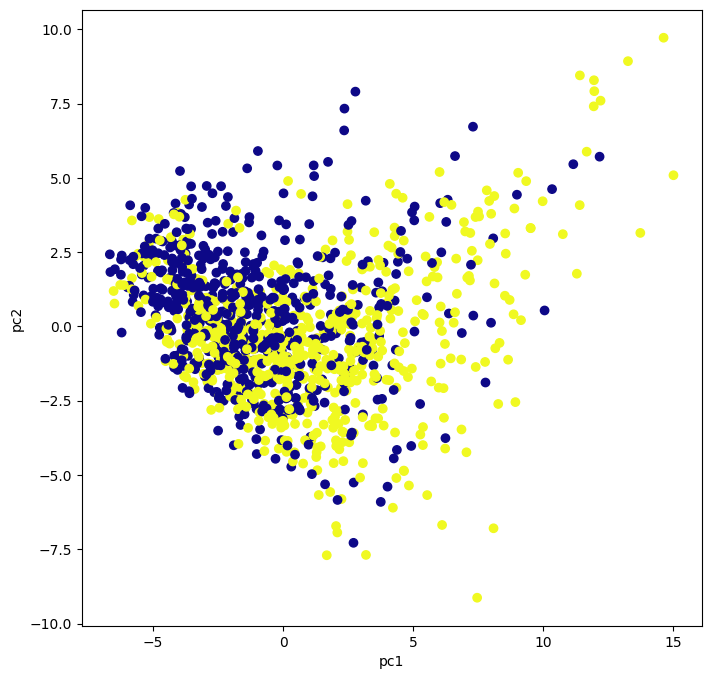

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c=target,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

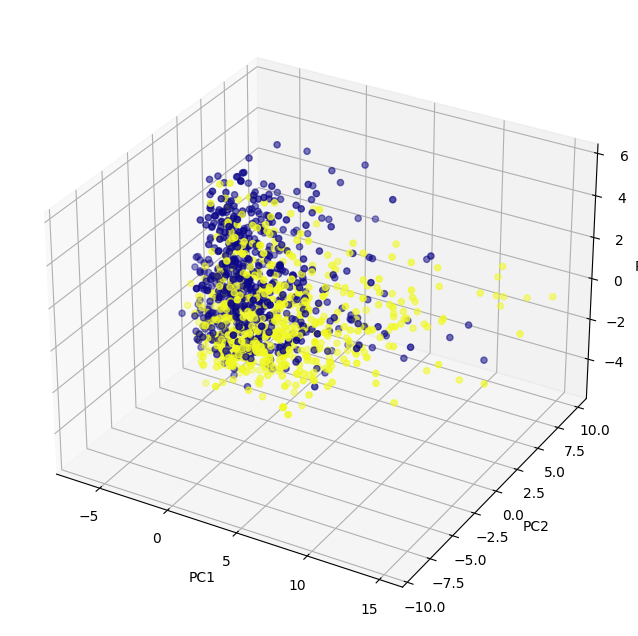

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
 # choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(X[:,0],X[:,1],X[:,2], c=target,cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

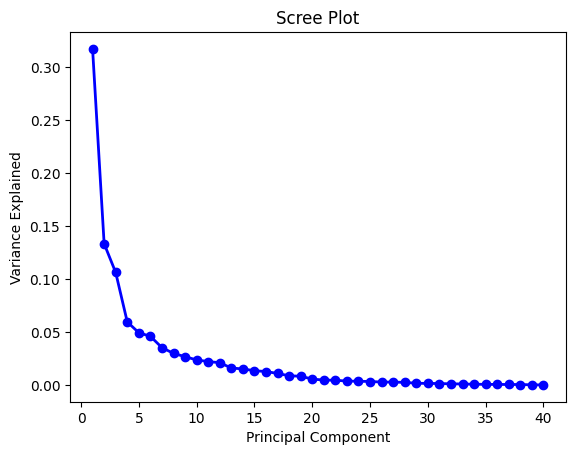

In [ ]:
import numpy as np
PC_values = np.arange(principal.n_components_) + 1
plt.plot(PC_values, principal.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

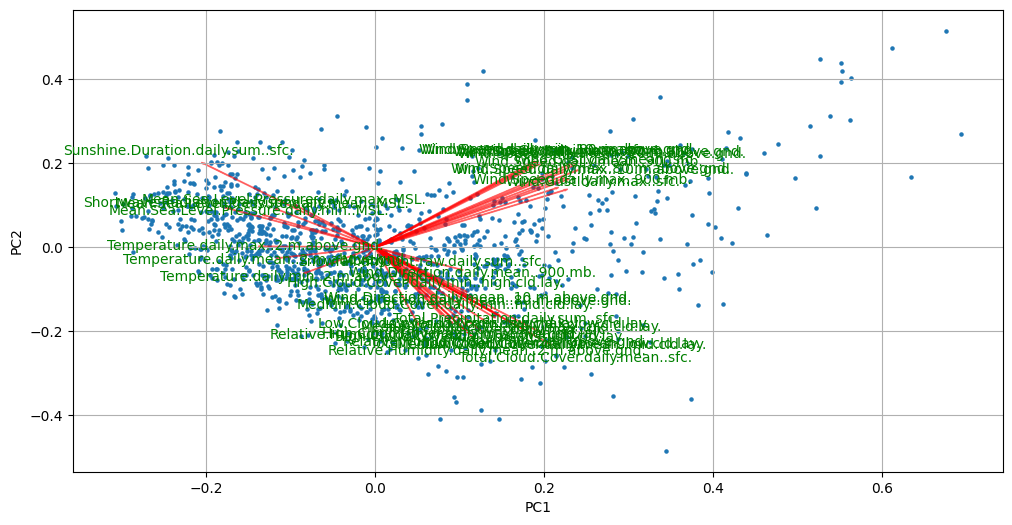

In [ ]:
plt.figure(figsize=(12, 6))
biplot(X, np.transpose(principal.components_), list(features))